## <center> Predicting Credit Defaults using Neural Networks


### Exploratory Data Analysis and Pre-processing data

In [1]:
import numpy as np
import pandas as pd


In [2]:
# Load your training data set and splitting training data into X and y
df_train = pd.read_csv('CreditDefault_training.csv')
df_test = pd.read_csv('CreditDefault_Xtest.csv')

In [3]:
#standardization of continuous variables of the training set
from sklearn.preprocessing import StandardScaler

# Selecting the continuous variables
stand_cont_train = df_train[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

# Applying StandardScaler
scaler = StandardScaler()
cont_scaled_train = scaler.fit_transform(stand_cont_train)

# Converting to DataFrame
cont_scaled_df_train = pd.DataFrame(cont_scaled_train, columns=stand_cont_train.columns)


print(cont_scaled_df_train.head())

   LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  -0.902690 -1.237370  -0.659401  -0.657623  -0.653395  -0.558590  -0.564919   
1  -0.751263 -1.237370   0.123571   0.174192   0.222944   0.299113   0.397532   
2   1.898720  0.816144  -0.573530  -0.484216  -0.572498  -0.613365  -0.597173   
3  -1.054118  1.896941  -0.680080  -0.679090  -0.618263  -0.598931  -0.584702   
4  -0.902690  1.464622  -0.427412  -0.411319  -0.357541  -0.331676  -0.296197   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0  -0.630095 -0.264370 -0.244519  0.071315 -0.262679 -0.267721  1.270320  
1   0.500862 -0.175510 -0.171175 -0.178872 -0.109918  0.049149 -0.300705  
2  -0.540866  0.526037  0.097548 -0.157124 -0.108494  0.057642  1.564334  
3  -0.635727 -0.362190 -0.116218 -0.332890 -0.268056 -0.288256 -0.300705  
4  -0.272334 -0.299963 -0.154688 -0.332890 -0.215343 -0.230083 -0.242460  


In [4]:
#standardization of continuous variables of the test set
from sklearn.preprocessing import StandardScaler

# Selecting the continuous variables
stand_cont_test = df_test[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

# Applying StandardScaler
scaler = StandardScaler()
cont_scaled_test = scaler.fit_transform(stand_cont_test)

# Converting to DataFrame
cont_scaled_df_test = pd.DataFrame(cont_scaled_test, columns=stand_cont_test.columns)


print(cont_scaled_df_test.head())

   LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  -0.630510  0.620300   1.634425   1.512066   1.351052  -0.369743  -0.607774   
1  -0.863285 -0.044189  -0.029025  -0.424391  -0.422265  -0.382195  -0.355548   
2  -0.630510  0.731049  -0.452793  -0.420992  -0.387009  -0.345811  -0.307403   
3  -0.009777 -0.930174   0.713256   0.435431   0.536011  -0.034137   0.033896   
4  -1.018468 -0.597929  -0.571248  -0.515319  -0.477150  -0.414975  -0.375876   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0  -0.444210 -0.082065 -0.172661 -0.223336 -0.114938  0.421282 -0.196015  
1  -0.330376 -0.279571  0.078449 -0.233273 -0.258322 -0.285271 -0.247379  
2  -0.293458 -0.277090 -0.295516 -0.233030 -0.258322 -0.328137 -0.183797  
3  -0.646624 -0.135306 -0.160510 -0.189408 -0.195212 -0.328137 -0.277784  
4  -0.308253 -0.177841 -0.275265 -0.174867 -0.258322 -0.137056 -0.230790  


In [5]:
# one-hot encoding of categorical variables of the training data set
from sklearn.preprocessing import OneHotEncoder

cat_data_train = df_train[['SEX', 'EDUCATION', 'MARRIAGE']]

# Applying OneHotEncoder
encoder = OneHotEncoder(sparse=False)
categorical_encoded_train_1 = encoder.fit_transform(cat_data_train)
categorical_encoded_df_train_1 = pd.DataFrame(categorical_encoded_train_1, columns=encoder.get_feature_names_out(cat_data_train.columns))

# Encoding the other categorical variables from 'PAY_1' to 'PAY_6'

# Creating a numpy array with all possible values of PAY columns
cat = np.array([-2,-1,0,1,2,3,4,5,6,7,8,9])
a_cat = []

 #Creating a list of 6 numpy arrays that represent each PAY column containing all the possible values
for i in range(0,6):
  a_cat.append(cat)


cat_data_train_2 = df_train[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
#Encoding the training set for PAY_1 to PAY_6 variables
encoder_1 = OneHotEncoder(sparse = False, categories= a_cat)
categorical_encoded_train_2 = encoder_1.fit_transform(cat_data_train_2)
categorical_encoded_df_train_2 = pd.DataFrame(categorical_encoded_train_2, columns=encoder_1.get_feature_names_out(cat_data_train_2.columns))


categorical_encoded_df_train = pd.concat([categorical_encoded_df_train_1,categorical_encoded_df_train_2], axis =1)
print(categorical_encoded_df_train.head())


   SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0    0.0    1.0          0.0          1.0          0.0          0.0   
1    0.0    1.0          0.0          1.0          0.0          0.0   
2    1.0    0.0          1.0          0.0          0.0          0.0   
3    1.0    0.0          0.0          1.0          0.0          0.0   
4    0.0    1.0          0.0          1.0          0.0          0.0   

   EDUCATION_5  EDUCATION_6  MARRIAGE_1  MARRIAGE_2  ...  PAY_6_0  PAY_6_1  \
0          0.0          0.0         0.0         1.0  ...      0.0      0.0   
1          0.0          0.0         0.0         1.0  ...      1.0      0.0   
2          0.0          0.0         1.0         0.0  ...      0.0      0.0   
3          0.0          0.0         0.0         0.0  ...      1.0      0.0   
4          0.0          0.0         1.0         0.0  ...      1.0      0.0   

   PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  PAY_6_9  
0      0.0      0.0      0.0

/Users/mishika/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/mishika/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
# one-hot encoding of categorical variables of the test data set
from sklearn.preprocessing import OneHotEncoder

cat_data_test = df_test[['SEX', 'EDUCATION', 'MARRIAGE']]

# Applying OneHotEncoder
encoder = OneHotEncoder(sparse=False)
categorical_encoded_test_1 = encoder.fit_transform(cat_data_test)
categorical_encoded_df_test_1 = pd.DataFrame(categorical_encoded_test_1, columns=encoder.get_feature_names_out(cat_data_test.columns))

# Encoding the other categorical variables from 'PAY_1' to 'PAY_6'

# Creating a numpy array with all possible values of PAY columns
cat = np.array([-2,-1,0,1,2,3,4,5,6,7,8,9])
a_cat = []

 #Creating a list of 6 numpy arrays that represent each PAY column containing all the possible values
for i in range(0,6):
  a_cat.append(cat)


cat_data_test_2 = df_test[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
#Encoding the training set for PAY_1 to PAY_6 variables
categorical_encoded_test_2 = encoder_1.transform(cat_data_test_2)
categorical_encoded_df_test_2 = pd.DataFrame(categorical_encoded_test_2, columns=encoder_1.get_feature_names_out(cat_data_test_2.columns))

categorical_encoded_df_test = pd.concat([categorical_encoded_df_test_1,categorical_encoded_df_test_2], axis =1)
print(categorical_encoded_df_test.head())

   SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0    1.0    0.0          0.0          0.0          0.0          0.0   
1    1.0    0.0          1.0          0.0          0.0          0.0   
2    0.0    1.0          1.0          0.0          0.0          0.0   
3    0.0    1.0          0.0          1.0          0.0          0.0   
4    1.0    0.0          1.0          0.0          0.0          0.0   

   EDUCATION_5  EDUCATION_6  MARRIAGE_1  MARRIAGE_2  ...  PAY_6_0  PAY_6_1  \
0          0.0          1.0         1.0         0.0  ...      0.0      0.0   
1          0.0          0.0         0.0         1.0  ...      1.0      0.0   
2          0.0          0.0         1.0         0.0  ...      0.0      0.0   
3          0.0          0.0         0.0         1.0  ...      1.0      0.0   
4          0.0          0.0         1.0         0.0  ...      1.0      0.0   

   PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  PAY_6_9  
0      0.0      0.0      0.0

/Users/mishika/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
# One-hot encoding for the target variable (y)
y_encoder = OneHotEncoder(sparse=False)
#y_encoded = y_encoder.fit_transform(y.values.reshape(-1, 1))
y_encoded = y_encoder.fit_transform(df_train['default.payment.next.month'].values.reshape(-1,1))
y_encoded_df = pd.DataFrame(y_encoded, columns=y_encoder.get_feature_names_out(['default.payment.next.month']))

/Users/mishika/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
y_encoded_df

,default.payment.next.month_0,default.payment.next.month_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
3980,1.0,0.0
3981,1.0,0.0
3982,1.0,0.0
3983,0.0,1.0


In [9]:
# Resetting index to align the dataframes before combining
categorical_encoded_df_train.reset_index(drop=True, inplace=True) # training set
cont_scaled_df_train.reset_index(drop=True, inplace=True) # training set

categorical_encoded_df_test.reset_index(drop=True, inplace=True) # test set
cont_scaled_df_test.reset_index(drop=True, inplace=True) # test set

# Combining encoded categorical data and scaled numerical data of the training set
combined_df_train = pd.concat([cont_scaled_df_train,categorical_encoded_df_train, y_encoded_df], axis=1)

# Combining encoded categorical data and scaled numerical data of the test set
combined_df_test= pd.concat([cont_scaled_df_test,categorical_encoded_df_test], axis=1)


print(combined_df_train.head())
print(combined_df_test.head())

   LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  -0.902690 -1.237370  -0.659401  -0.657623  -0.653395  -0.558590  -0.564919   
1  -0.751263 -1.237370   0.123571   0.174192   0.222944   0.299113   0.397532   
2   1.898720  0.816144  -0.573530  -0.484216  -0.572498  -0.613365  -0.597173   
3  -1.054118  1.896941  -0.680080  -0.679090  -0.618263  -0.598931  -0.584702   
4  -0.902690  1.464622  -0.427412  -0.411319  -0.357541  -0.331676  -0.296197   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  \
0  -0.630095 -0.264370 -0.244519  ...      0.0      0.0      0.0      0.0   
1   0.500862 -0.175510 -0.171175  ...      0.0      0.0      0.0      0.0   
2  -0.540866  0.526037  0.097548  ...      0.0      0.0      0.0      0.0   
3  -0.635727 -0.362190 -0.116218  ...      0.0      0.0      0.0      0.0   
4  -0.272334 -0.299963 -0.154688  ...      0.0      0.0      0.0      0.0   

   PAY_6_6  PAY_6_7  PAY_6_8  PAY_6_9  default.pay

In [10]:
# Our combined DataFrame after preprocessing is named combined_df_train
# And the target variable is ''default.payment.next.month'

# Separating the features and the target variable
X = combined_df_train.drop(columns=['default.payment.next.month_0', 'default.payment.next.month_1'], axis=1)
y = combined_df_train[['default.payment.next.month_0', 'default.payment.next.month_1']]

In [11]:
# Splitting  data into training and validation set 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:

X_train.shape

(2789, 97)

### Modeling - Part 1 (Neural Network)


In [13]:
pip install tensorflow==2.14.0

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Importing required libraries

from keras.models import Sequential 
# Keras refers to an architecture in which the outputs of \
#one layer are the inputs to the next as "Sequential"

from keras.layers import Dense
# "dense" connection between layers, where every input unit connects to a unit in the next layer

from tensorflow.keras.optimizers.legacy import SGD # SGD is the learning algorithm used

from keras.layers import Dense, Dropout

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
def build_final_model():
    model = Sequential()
    
    model.add(Dense(units=128, input_shape=(X_train.shape[1],), activation='relu'))

    # Drop out layer
    model.add(Dropout(0.2))

    # Continues the process
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

    #  readout layer
    model.add(Dense(2, activation='softmax'))

    
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])


    return model

In [16]:
model = build_final_model()

In [17]:

model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
88/88 [==============================] - 0s 391us/step - loss: 0.5827 - accuracy: 0.7433
Epoch 2/100
88/88 [==============================] - 0s 368us/step - loss: 0.5310 - accuracy: 0.7651
Epoch 3/100
88/88 [==============================] - 0s 363us/step - loss: 0.5217 - accuracy: 0.7673
Epoch 4/100
88/88 [==============================] - 0s 365us/step - loss: 0.5120 - accuracy: 0.7702
Epoch 5/100
88/88 [==============================] - 0s 367us/step - loss: 0.4931 - accuracy: 0.7766
Epoch 6/100
88/88 [==============================] - 0s 370us/step - loss: 0.4918 - accuracy: 0.7806
Epoch 7/100
88/88 [==============================] - 0s 365us/step - loss: 0.4868 - accuracy: 0.7806
Epoch 8/100
88/88 [==============================] - 0s 363us/step - loss: 0.4821 - accuracy: 0.7863
Epoch 9/100
88/88 [==============================] - 0s 368us/step - loss: 0.4766 - accuracy: 0.7842
Epoch 10/100
88/88 [==============================] - 0s 365us/step - loss: 0.4761 - accura

88/88 [==============================] - 0s 363us/step - loss: 0.4201 - accuracy: 0.8222
Epoch 82/100
88/88 [==============================] - 0s 361us/step - loss: 0.4177 - accuracy: 0.8189
Epoch 83/100
88/88 [==============================] - 0s 360us/step - loss: 0.4103 - accuracy: 0.8243
Epoch 84/100
88/88 [==============================] - 0s 368us/step - loss: 0.4177 - accuracy: 0.8222
Epoch 85/100
88/88 [==============================] - 0s 357us/step - loss: 0.4134 - accuracy: 0.8200
Epoch 86/100
88/88 [==============================] - 0s 368us/step - loss: 0.4168 - accuracy: 0.8189
Epoch 87/100
88/88 [==============================] - 0s 359us/step - loss: 0.4176 - accuracy: 0.8168
Epoch 88/100
88/88 [==============================] - 0s 357us/step - loss: 0.4147 - accuracy: 0.8200
Epoch 89/100
88/88 [==============================] - 0s 356us/step - loss: 0.4171 - accuracy: 0.8236
Epoch 90/100
88/88 [==============================] - 0s 362us/step - loss: 0.4122 - accuracy: 

In [18]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)
y_pred_int = np.argmax(y_pred, axis=1)
y_val = np.array(y_val)
y_val_int = np.argmax(y_val, axis=1)


accuracy = accuracy_score(y_val_int, y_pred_int)

# Calculating precision, recall, and F1 score with 'macro' averaging
precision = precision_score(y_val_int, y_pred_int, average='macro')
recall = recall_score(y_val_int, y_pred_int, average='macro')
F1 = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", F1)

38/38 [==============================] - 0s 309us/step
Accuracy: 0.8068561872909699
Precision: 0.7230043804166109
Recall: 0.6797976161907048
F1 Score: 0.7007356070084545


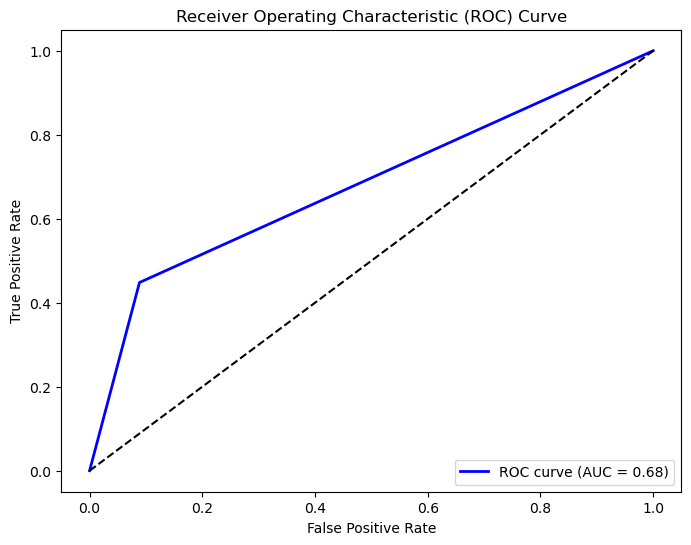

In [19]:
# Plotting the ROC curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

#  ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_val_int, y_pred_int)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The credit default dataset is often imbalanced, where the number of defaulters might be significantly lower than non-defaulters. In this cases, we have 920 defaulters and 3065 non-defaulters in the dataset. If the model predicts all instances as non-defaulters, it could achieve a high accuracy due to the imbalance, but it wouldn't be useful in practical terms for identifying defaults.

#### Tuning hyperparameters using cross-validation:<br/>
Cross-validation in neural networks is computationally expensive. So we will perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function.

Here, we will use KerasClassifier class, which act as a wrapper of scikit-learn’s library in Keras comes as a handy tool for automating the tuning process.

In [20]:
pip install scikeras

  Obtaining dependency information for scikeras from https://files.pythonhosted.org/packages/5d/fa/9c1967952e7889d698f10ba8b6af79dfaa2e05178d97a79fbd9d1b44e589/scikeras-0.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow-metal<2.0.0,>=1.1.0 from https://files.pythonhosted.org/packages/52/56/8373f5751011304a346f07e5423e69f809b626989d2541ae9e816ae7ced2/tensorflow_metal-1.1.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

In [22]:
# create_model function with activation function and learning rate of SGD as parameters
def create_model(params):
    opt = SGD(learning_rate=params["learning_rate"], decay=1e-7, momentum=.9)
    model = Sequential()
    model.add(Dense(units=64, input_dim=97, activation=params["activation"]))
    model.add(Dense(units=128, activation=params["activation"]))
    model.add(Dense(units=256, activation=params["activation"]))
    model.add(Dense(units=2, activation='softmax'))
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])
    return model

In [23]:
model = KerasClassifier(model=lambda **params: create_model(params), verbose=0)

Using the following hyperparameters:

- activation function: relu, tanh

- batch size: 16, 32 and 64

- epochs: 100, 200 and 500

- learning rate: 0.01, 0.001 and 0.0001



In [24]:

param_grid = {
    'model__activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'epochs': [100, 200, 500],
    'model__learning_rate': [0.01, 0.001, 0.0001]
}

Next we perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function. We select the randomized search as it works faster than a grid search. Here, we will perform a 5-fold cross-validation search.

In [ ]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, n_iter=10, random_state=42)

In [ ]:
random_search_results = random_search.fit(X_train, y_train) ## may take several hours

In [ ]:
#best model parameters
print(random_search.best_params_)
print(random_search_results.best_score_)

{'model__learning_rate': 0.0001, 'model__activation': 'tanh', 'epochs': 100, 'batch_size': 16}
0.8153381852345193


In [ ]:
# Fitting the model with the Best Parameter Set
params = random_search_results.best_params_
params_1 = {k.replace("model__", ""): v for k, v in params.items()}
best_model = create_model(params_1)
best_model.fit(X_train, y_train, params_1.get('batch_size', 32), epochs=params_1.get('epochs', 100))

loss, accuracy = best_model.evaluate(X_val, y_val)
print("Loss:", loss)
print("Accuracy:", accuracy)


Epoch 1/100
175/175 [==============================] - 1s 4ms/step - loss: 0.6016 - accuracy: 0.6902
Epoch 2/100
175/175 [==============================] - 1s 4ms/step - loss: 0.5291 - accuracy: 0.7655
Epoch 3/100
175/175 [==============================] - 1s 7ms/step - loss: 0.5058 - accuracy: 0.7684
Epoch 4/100
175/175 [==============================] - 1s 8ms/step - loss: 0.4919 - accuracy: 0.7734
Epoch 5/100
175/175 [==============================] - 1s 5ms/step - loss: 0.4820 - accuracy: 0.7788
Epoch 6/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4745 - accuracy: 0.7831
Epoch 7/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4685 - accuracy: 0.7820
Epoch 8/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4640 - accuracy: 0.7859
Epoch 9/100
175/175 [==============================] - 1s 5ms/step - loss: 0.4603 - accuracy: 0.7902
Epoch 10/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4574 - accura

In [ ]:

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_val_pred = best_model.predict(X_val)
y_pred_int = np.argmax(y_val_pred, axis=1)
y_val = np.array(y_val)
y_val_int = np.argmax(y_val, axis=1)


accuracy = accuracy_score(y_val_int, y_pred_int)


precision = precision_score(y_val_int, y_pred_int, average='macro')
recall = recall_score(y_val_int, y_pred_int, average='macro')
F1 = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", F1)


38/38 [==============================] - 0s 2ms/step
Accuracy: 0.8244147157190636
Precision: 0.7613536675889061
Recall: 0.6858891288696904
F1 Score: 0.7216538995421259


This model with the best parameter set performs better than the first neural network model since it has a higher value on accuracy, precision, recall, and F1 score. The reason is that hyperparameter tuning aims to improve the model's ability to generalize well to unseen data. By finding the best hyperparameters through techniques like random search, the model becomes less prone to overfitting and performs better on new, unseen data.


### Modeling - Part 2  (Logistic Regression and Random Forest)


In [ ]:
def logistic_regression_model(X_train, y_train):
   
  param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
        'penalty': ['l1', 'l2'],  # Regularization type
        'solver': ['liblinear', 'saga']
    }

    # Create a logistic regression model
  logistic_reg = LogisticRegression(max_iter=350)

    # Create GridSearchCV to find the best parameters
  grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


    # Get the best logistic regression model with the best parameters
  grid_result = grid_search.fit(X_train,y_train)
  best_logistic_model = grid_result.best_estimator_

  return best_logistic_model

In [ ]:
# fitting the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming we have X_train, y_train, X_val, and y_val

# Splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Obtaining the best logistic regression model
best_logistic_model = logistic_regression_model(X_train, y_train.iloc[:,1])

# Fitting the model on the training set
best_logistic_model.fit(X_train, y_train.iloc[:,1])

# Obtaining predictions on the validation set
y_pred = best_logistic_model.predict(X_val)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:

accuracy = accuracy_score(y_val.iloc[:,1], y_pred)
precision = precision_score(y_val.iloc[:,1], y_pred)
recall = recall_score(y_val.iloc[:,1], y_pred)
f1 = f1_score(y_val.iloc[:,1], y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8172
Precision: 0.7576
Recall: 0.3676
F1 Score: 0.4950


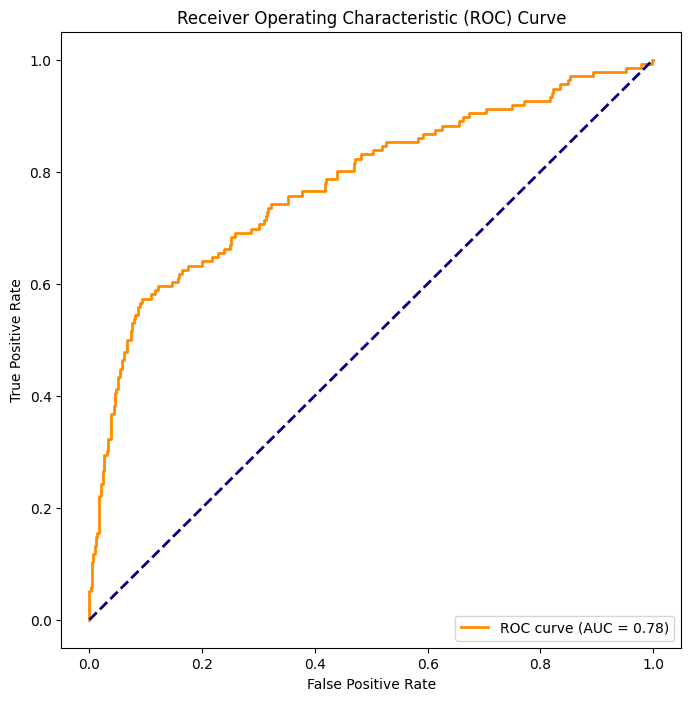

In [ ]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = best_logistic_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val.iloc[:,1], y_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Implementing a function random_forest_model that returns a random forest model with the best paprameters. Applying GridSearchCV to find the best parameters

In [ ]:
def random_forest_model(X_train, y_train):
    rf = RandomForestClassifier(random_state=26) # random state = 26
    ### YOUR CODE HERE ###
# Define the parameter grid to search
    param_grid = {
        'n_estimators': [50, 100, 150],        # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],        # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
        'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
    }

    # Create GridSearchCV to find the best parameters
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the GridSearchCV on the training data
    grid_search.fit(X_train, y_train)

    # Get the best Random Forest model with the best parameters
    best_rf_model = grid_search.best_estimator_

    return best_rf_model

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Obtaining the best Random Forest model
best_rf_model = random_forest_model(X_train, y_train.iloc[:,1])

# Fitting the model on the training set
best_rf_model.fit(X_train, y_train.iloc[:,1])

# Obtaining predictions on the validation set
y_pred_rf = best_rf_model.predict(X_val)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:

accuracy_rf = accuracy_score(y_val.iloc[:,1], y_pred_rf)
precision_rf = precision_score(y_val.iloc[:,1], y_pred_rf, average ='macro')
recall_rf = recall_score(y_val.iloc[:,1], y_pred_rf, average= 'macro')
f1_rf = f1_score(y_val.iloc[:,1], y_pred_rf, average= 'macro')


print(f"Random Forest Model Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

Random Forest Model Metrics:
Accuracy: 0.8143
Precision: 0.7731
Recall: 0.6510
F1 Score: 0.6761


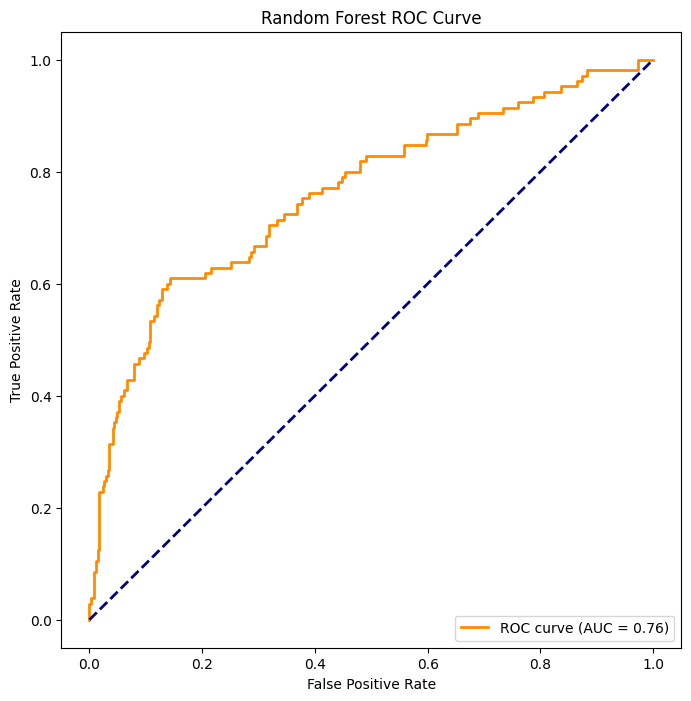

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Obtaining predicted probabilities for the positive class
y_prob_rf = best_rf_model.predict_proba(X_val)[:,1]


fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val.iloc[:,1], y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### Evaluation of the 3 models
 First we need to decide which metric to evaluate the model performance. In this case, we are testing whether there will be a default or not, which often exhibits class imbalance, where the number of non-default instances is significantly higher than the number of default instances. In such scenarios, accuracy might be misleading as a metric because a model predicting all instances as non-default would still yield high accuracy. Also, failing to identify an actual default (false negative) can lead to substantial financial losses for the institution. Emphasizing on "recall" aims to minimize these false negatives. From the above three models, NN (Neural Network) with hyperparameter tuning has the highest recall rate, 0.68311, which will be chosen as our best-predicted model.

To explain the performance of each model:
* Neural Network: Performs well with overall high accuracy, precision, recall, and F1 score values.
* Logistic Function: Although the accuracy and precision value seem to look fine, it has the lowest recall rate among all models, with only 0.3676, which won’t be chosen as a suitable model for predicting the default dataset.
* Random Forest: Though it does not perform as well as the NN model, the recall rate is close to the best model. Since Random Forest ensembles a learning approach and features importance metrics, it can be robust to outliers.




Using the best of the above 3 models, obtain predictions for the test set.

In [ ]:

# WE ARE CHOOSING THE HYPERPAREMETRISED NEURAL NETWORK MODEL
y_pred = best_model.predict(combined_df_test)
y_pred
y_pred = (y_pred > 0.5).astype("float64").reshape(-1)



---

